In [2]:
# Adjust the Python path to find the src module
import sys
import os

# Get the current working directory and add the project root to the Python path
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import functions from the recommendation system
from src.recommendation import (
    load_data,
    create_user_item_matrix,
    compute_user_similarity,
    predict_ratings,
    compute_tf_idf,
    svd_recommendation,
    evaluate_model,
    compute_tf_idf,
    recommend_items
)

# Set up visualization style
sns.set(style='whitegrid')

# Movie Recommendation System Demo

This notebook tests, compares, and visualizes the results of different recommendation algorithms implemented in the `recommendation.py` script. 

## Objectives
1. Test the performance of various recommendation algorithms.
2. Compare their effectiveness using evaluation metrics (e.g., RMSE).
3. Generate and visualize recommendations for sample users.


In [3]:
# Load the ratings and movies datasets
ratings = load_data('../data/ratings.csv')
movies = load_data('../data/movies.csv')

# Display basic information about the datasets
print(f"Number of ratings: {ratings.shape[0]}")
print(f"Number of movies: {movies.shape[0]}")
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Number of unique movies rated: {ratings['movieId'].nunique()}")

Number of ratings: 100836
Number of movies: 9742
Number of unique users: 610
Number of unique movies rated: 9724


In [4]:
# Create the user-item matrix for collaborative filtering
user_item_matrix = create_user_item_matrix(ratings)

print("User-Item Matrix (Sample):")
display(user_item_matrix.head())

User-Item Matrix (Sample):


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Compute user similarity matrix
user_similarity = compute_user_similarity(user_item_matrix)

print("User Similarity Matrix (Sample):")
display(user_similarity.head())

# Compute item similarity matrix using TF-IDF for genres
tf_idf_matrix = compute_tf_idf(movies)
item_similarity = tf_idf_matrix.dot(tf_idf_matrix.T)

print("Item Similarity Matrix (Sample):")
display(item_similarity.head())

User Similarity Matrix (Sample):


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


Item Similarity Matrix (Sample):


,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,1.053832,1.184632,0.090838,0.060559,0.181677,0.0,0.090838,1.138784,0.0,0.278245,...,0.428816,0.766794,0.090838,1.533588,0.0,0.747898,0.997198,0.000000,0.766794,0.181677
2,1.184632,1.974386,0.000000,0.000000,0.000000,0.0,0.000000,1.897973,0.0,0.463741,...,0.000000,0.000000,0.000000,0.000000,0.0,0.531803,0.709071,0.000000,0.000000,0.000000
3,0.090838,0.000000,1.045167,0.696778,0.454192,0.0,1.045167,0.000000,0.0,0.000000,...,0.113548,0.000000,0.227096,0.000000,0.0,0.113548,0.151397,0.000000,0.000000,0.454192
4,0.060559,0.000000,0.696778,0.536297,0.302795,0.0,0.696778,0.000000,0.0,0.000000,...,0.075699,0.107668,0.259065,0.000000,0.0,0.075699,0.100932,0.215335,0.000000,0.302795
5,0.181677,0.000000,0.454192,0.302795,0.908384,0.0,0.454192,0.000000,0.0,0.000000,...,0.227096,0.000000,0.454192,0.000000,0.0,0.227096,0.302795,0.000000,0.000000,0.908384


In [6]:
# Predict ratings using user-based collaborative filtering
predicted_ratings_user_cf = predict_ratings(user_item_matrix, user_similarity)

# Display a sample of the predicted ratings
print("Predicted Ratings (User-Based CF) (Sample):")
display(predicted_ratings_user_cf.head())

# Evaluate the user-based CF model
rmse_user_cf = evaluate_model(user_item_matrix, predicted_ratings_user_cf)
print(f'User-Based CF RMSE: {rmse_user_cf:.4f}')

Predicted Ratings (User-Based CF) (Sample):


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.512156,4.337305,4.333152,4.353222,4.310382,4.458542,4.318785,4.354511,4.351705,4.353549,...,4.366365,4.366330,4.366400,4.366400,4.366365,4.366400,4.366365,4.366365,4.366365,4.366652
2,4.023842,3.902729,3.933397,3.943695,3.914607,4.015118,3.930438,3.944382,3.938951,3.958272,...,3.947521,3.945681,3.949360,3.949360,3.947521,3.949360,3.947521,3.947521,3.947521,3.950582
3,2.581597,2.417122,2.416470,2.427014,2.379532,2.531922,2.402912,2.423996,2.427861,2.449473,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.686908,3.523907,3.526009,3.539837,3.493830,3.637597,3.495375,3.543491,3.542651,3.526435,...,3.555521,3.555435,3.555606,3.555606,3.555521,3.555606,3.555521,3.555521,3.555521,3.556002
5,3.806627,3.657814,3.619213,3.608600,3.582013,3.721539,3.613708,3.626196,3.620876,3.567195,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636698


User-Based CF RMSE: 0.8993


In [7]:
print("Dimensions of user_item_matrix:", user_item_matrix.shape)

print("Dimensions of item_similarity:", item_similarity.shape)

Dimensions of user_item_matrix: (610, 9724)
Dimensions of item_similarity: (9742, 9742)


In [8]:
# Find the intersection of item IDs present in both matrices
common_items = user_item_matrix.columns.intersection(item_similarity.index)

# Filter both matrices to keep only common items
user_item_matrix_filtered = user_item_matrix[common_items]
item_similarity_filtered = item_similarity.loc[common_items, common_items]

# Display the dimensions after filtering
print("Filtered Dimensions of user_item_matrix:", user_item_matrix_filtered.shape)
print("Filtered Dimensions of item_similarity:", item_similarity_filtered.shape)

Filtered Dimensions of user_item_matrix: (610, 9724)
Filtered Dimensions of item_similarity: (9724, 9724)


In [11]:
# Predict ratings using item-based collaborative filtering
predicted_ratings_item_cf = predict_ratings(user_item_matrix_filtered.T, item_similarity_filtered)

# Tranpose it to ease the comparison with the other models

predicted_ratings_item_cf = predicted_ratings_item_cf.T

# Display a sample of the predicted ratings
print("Predicted Ratings (Item-Based CF) (Sample):")
display(predicted_ratings_item_cf.head())

# Evaluate the item-based CF model
rmse_item_cf = evaluate_model(user_item_matrix, predicted_ratings_item_cf)
print(f'Item-Based CF RMSE: {rmse_item_cf:.4f}')

Predicted Ratings (Item-Based CF) (Sample):


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,3.965921,3.488413,3.271699,2.368202,3.085619,3.971106,3.197269,2.935401,3.159360,3.532247,...,3.529382,3.027846,4.011587,4.046631,3.500000,4.034791,3.534946,3.508372,3.540089,4.014190
2,3.921199,3.431988,3.260140,2.357553,3.072174,3.945408,3.185710,2.875249,3.125393,3.496200,...,3.500037,3.000054,4.000461,4.000000,3.500492,4.000311,3.500282,3.500110,3.500209,4.000746
3,3.912894,3.424689,3.254303,2.350483,3.068353,3.945480,3.179873,2.864369,3.124698,3.495368,...,3.498016,2.986502,3.993740,3.983312,3.500000,3.995261,3.493654,3.489808,3.492048,3.996924
4,3.920111,3.430509,3.251594,2.349892,3.068977,3.941376,3.177164,2.874270,3.118107,3.490681,...,3.495490,2.998759,3.996304,4.002607,3.500765,3.997524,3.499123,3.494769,3.497542,3.997548
5,3.922902,3.434128,3.257456,2.355606,3.071045,3.945545,3.183026,2.876926,3.123174,3.494819,...,3.499566,3.001959,3.999830,4.003757,3.500000,4.000984,3.502002,3.500094,3.500781,3.999616


Item-Based CF RMSE: 0.8661


In [14]:
# Predict ratings using SVD
predicted_ratings_user_svd = svd_recommendation(user_item_matrix, k=250)
print("Predicted Ratings (User-Based SVD) (Sample):")
display(predicted_ratings_user_svd.head())

# Evaluate the SVD model
rmse_svd = evaluate_model(user_item_matrix, predicted_ratings_user_svd)
print(f'SVD-Based RMSE: {rmse_svd:.4f}')

Predicted Ratings (User-Based SVD) (Sample):


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.173299,-0.136405,4.241399,-0.010683,-0.010199,3.888443,0.179486,-0.003526,0.023741,-0.064963,...,-0.011796,-0.010111,-0.013482,-0.013482,-0.011796,-0.013482,-0.011796,-0.011796,-0.011796,-0.027479
2,-0.546562,0.369973,0.144550,0.007645,0.184669,-0.116725,-0.138410,-0.006907,-0.135416,0.250916,...,0.011631,0.009969,0.013292,0.013292,0.011631,0.013292,0.011631,0.011631,0.011631,0.074914
3,0.057199,-0.062102,0.049155,0.006854,0.040606,0.191018,0.020770,-0.045185,0.069939,0.048839,...,-0.015218,-0.013044,-0.017391,-0.017391,-0.015218,-0.017391,-0.015218,-0.015218,-0.015218,-0.002203
4,-0.163224,-0.202446,0.114893,-0.067981,-0.023109,0.013974,-0.010259,-0.056621,0.112895,0.098267,...,0.012882,0.011041,0.014722,0.014722,0.012882,0.014722,0.012882,0.012882,0.012882,-0.039118
5,2.596891,0.384590,0.199836,0.040572,0.175385,-0.216346,0.302342,0.154949,-0.266075,-0.149821,...,0.047463,0.040683,0.054243,0.054243,0.047463,0.054243,0.047463,0.047463,0.047463,-0.001141


SVD-Based RMSE: 0.8223


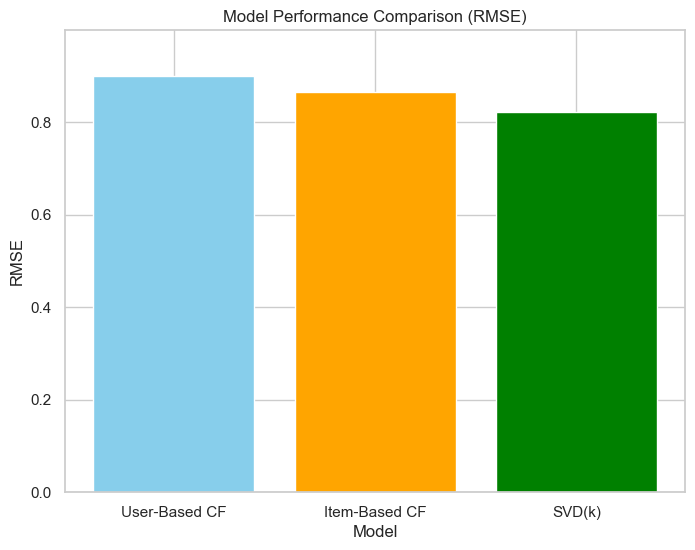

In [37]:
# Prepare data for plotting
models = ['User-Based CF', 'Item-Based CF', 'SVD(k)']
rmse_values = [rmse_user_cf, rmse_item_cf, rmse_svd]

# Plot RMSE comparison for different models
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['skyblue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.ylim(0, max(rmse_values) + 0.1)  # Set the Y-axis limit slightly above the max RMSE
plt.show()

In [36]:
# Extract User 1's ratings
sample_user_id = 1
user_1_ratings = ratings[ratings['userId'] == sample_user_id]
user_1_movies = pd.merge(user_1_ratings, movies, on='movieId')

# Sort User 1's rated movies by rating in descending order
user_1_movies_sorted = user_1_movies.sort_values(by='rating', ascending=False)

# Display User 1's rated movies and their properties, sorted by highest ratings
print(f"Highest Rated Movies by User {sample_user_id}:")
display(user_1_movies_sorted[['title', 'genres', 'rating']])

Highest Rated Movies by User 1:


,title,genres,rating
231,M*A*S*H (a.k.a. MASH) (1970),"[Comedy, Drama, War]",5.0
185,Excalibur (1981),"[Adventure, Fantasy]",5.0
89,Indiana Jones and the Last Crusade (1989),"[Action, Adventure]",5.0
90,Pink Floyd: The Wall (1982),"[Drama, Musical]",5.0
190,From Russia with Love (1963),"[Action, Adventure, Thriller]",5.0
...,...,...,...
170,"Mummy, The (1999)","[Action, Adventure, Comedy, Fantasy, Horror, T...",2.0
143,Toys (1992),"[Comedy, Fantasy]",2.0
148,I Still Know What You Did Last Summer (1998),"[Horror, Mystery, Thriller]",2.0
152,Psycho (1998),"[Crime, Horror, Thriller]",2.0


In [35]:
# Function to generate top-N recommendations including genres
def recommend_top_n(user_id, predicted_ratings, movies, num_recommendations=5):
    """
    Generate top-N movie recommendations for a given user, including genres.

    Args:
    - user_id (int): The user ID for whom to generate recommendations.
    - predicted_ratings (DataFrame): The predicted ratings DataFrame from a chosen model.
    - movies (DataFrame): The DataFrame containing movie titles, genres, and IDs.
    - num_recommendations (int): Number of recommendations to generate.

    Returns:
    - recommendations (DataFrame): DataFrame of recommended movie titles, genres, and predicted ratings.
    """
    # Get the predicted ratings for the user and sort them in descending order
    user_ratings = predicted_ratings.loc[user_id].sort_values(ascending=False).head(num_recommendations)
    
    # Map the predicted ratings to movie titles and genres
    movie_info = movies.set_index('movieId').loc[user_ratings.index][['title', 'genres']]
    recommendations = pd.DataFrame({
        'Movie': movie_info['title'],
        'Genres': movie_info['genres'],
        'Predicted Rating': user_ratings.values
    })
    
    return recommendations

# Generate recommendations for a sample user (User 1)
sample_user_id = 1

# Predictions using Collaborative Filtering (User-Based CF)
top_n_recommendations_user_cf = recommend_top_n(sample_user_id, predicted_ratings_user_cf, movies)
print(f"Top {len(top_n_recommendations_user_cf)} Recommendations for User {sample_user_id} (User-Based Collaborative Filtering):")
display(top_n_recommendations_user_cf)

# Predictions using Collaborative Filtering (Item-Based CF)
top_n_recommendations_item_cf = recommend_top_n(sample_user_id, predicted_ratings_item_cf, movies)
print(f"Top {len(top_n_recommendations_item_cf)} Recommendations for User {sample_user_id} (Item-Based Collaborative Filtering):")
display(top_n_recommendations_item_cf)

# Predictions using SVD
top_n_recommendations_svd = recommend_top_n(sample_user_id, predicted_ratings_user_svd, movies)
print(f"Top {len(top_n_recommendations_svd)} Recommendations for User {sample_user_id} (SVD):")
display(top_n_recommendations_svd)

Top 5 Recommendations for User 1 (User-Based Collaborative Filtering):


,Movie,Genres,Predicted Rating
movieId,,,
318,"Shawshank Redemption, The (1994)","[Crime, Drama]",4.827565
296,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",4.778033
260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",4.756979
1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",4.725153
356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",4.725035


Top 5 Recommendations for User 1 (Item-Based Collaborative Filtering):


,Movie,Genres,Predicted Rating
movieId,,,
166183,Junior and Karlson (1968),"[Adventure, Animation, Children]",5.055895
172585,Karlson Returns (1970),"[Adventure, Animation, Children]",5.055895
175387,On the Trail of the Bremen Town Musicians (1973),"[Adventure, Animation, Children]",5.055895
172793,Vovka in the Kingdom of Far Far Away (1965),"[Adventure, Animation, Children, Fantasy]",5.054117
175293,Gena the Crocodile (1969),"[Animation, Children]",5.053523


Top 5 Recommendations for User 1 (SVD):


,Movie,Genres,Predicted Rating
movieId,,,
231,Dumb & Dumber (Dumb and Dumber) (1994),"[Adventure, Comedy]",5.407322
457,"Fugitive, The (1993)",[Thriller],5.381634
1136,Monty Python and the Holy Grail (1975),"[Adventure, Comedy, Fantasy]",5.376325
333,Tommy Boy (1995),[Comedy],5.365746
50,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",5.297292
